In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Plot the train results

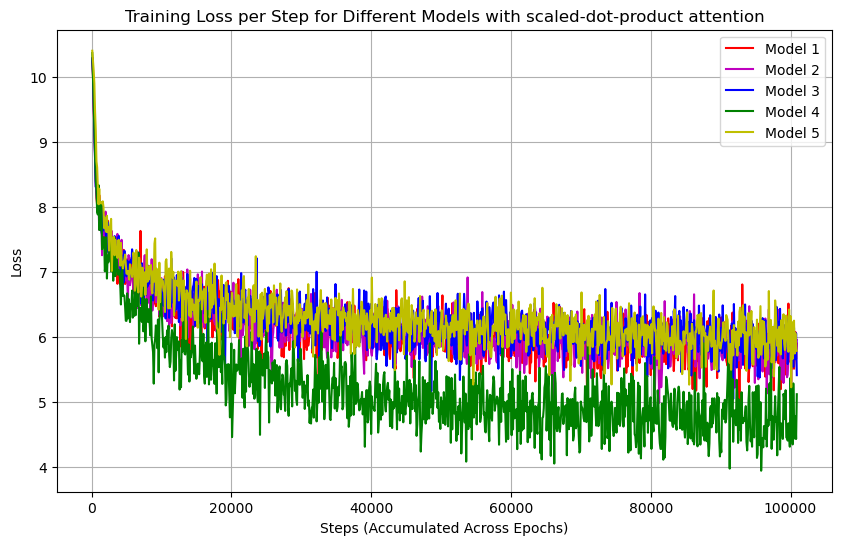

In [12]:
save_path = "training-results/metrics/"

def compute_global_steps(df):
    max_step_per_epoch = df["Step"].max()
    df["Global_Step"] = df["Step"] + df["Epoch"] * (max_step_per_epoch + 100) 
    return df

csv_files = ["ex_config-1_train_results.csv", "ex_config-2_train_results.csv", "ex_config-3_train_results.csv", "ex_config-4_train_results.csv", "ex_config-5_train_results.csv"]
csv_files = [os.path.join(save_path, filename) for filename in csv_files]

colors = ['r', 'm', 'b', 'g', 'y']
labels = [f"Model {i+1}" for i, _ in enumerate(csv_files)]

plt.figure(figsize=(10, 6))

for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df = compute_global_steps(df)
    plt.plot(df["Global_Step"], df["Loss"], label=labels[i], color=colors[i])

plt.xlabel("Steps (Accumulated Across Epochs)")
plt.ylabel("Loss")
plt.title("Training Loss per Step for Different Models with scaled-dot-product attention")
plt.legend()
plt.grid(True)

plt.show()

# Plot the validation results

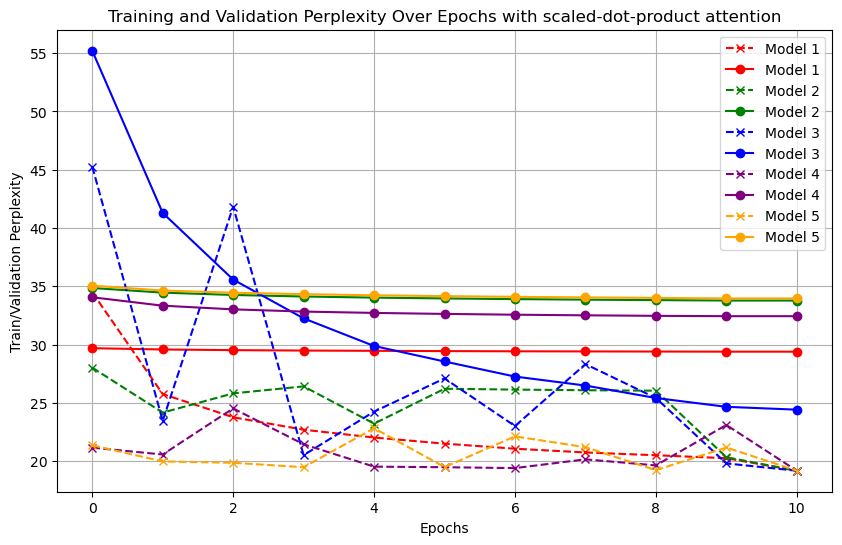

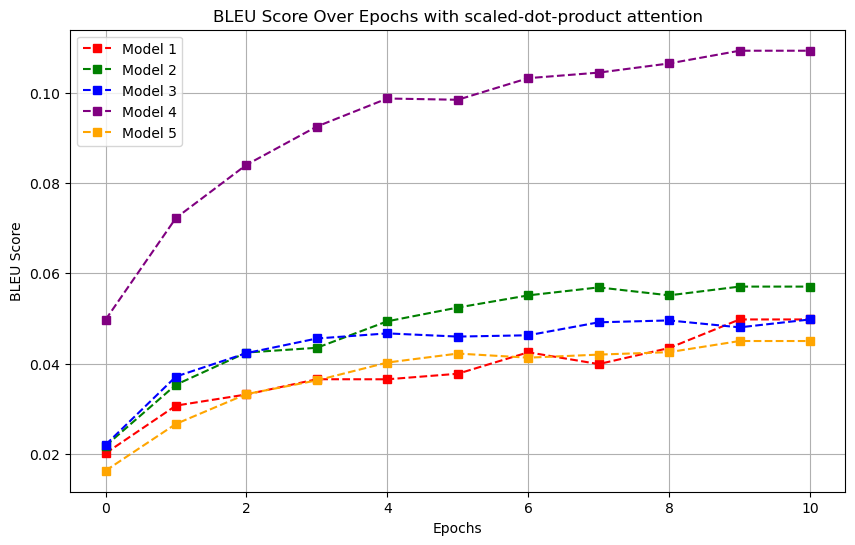

In [16]:
# Train & Validation perplexity
csv_files = ["ex_config-1_validation_results.csv", "ex_config-2_validation_results.csv", "ex_config-3_validation_results.csv", "ex_config-4_validation_results.csv", "ex_config-5_validation_results.csv"]
csv_files = [os.path.join(save_path, filename) for filename in csv_files]

colors = ["red", "green", "blue", "purple", "orange"]
labels = [f"Model {i+1}" for i, _ in enumerate(csv_files)]

plt.figure(figsize=(10, 6))

for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip()

    plt.plot(df["Epoch"], df["TrainPerplexity"], color=colors[i], marker="x", linestyle='--', label=labels[i])
    
    plt.plot(df["Epoch"], df["ValidPerplexity"], color=colors[i], marker="o", label=labels[i])

plt.xlabel("Epochs")
plt.ylabel("Train/Validation Perplexity")
plt.title("Training and Validation Perplexity Over Epochs with scaled-dot-product attention")
plt.legend()
plt.grid(True)
plt.show()

# BlEU score
plt.figure(figsize=(10, 6))
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip()
    plt.plot(df["Epoch"], df["Bleu"], color=colors[i], marker="s", linestyle="dashed", label=labels[i])

plt.xlabel("Epochs")
plt.ylabel("BLEU Score")
plt.title("BLEU Score Over Epochs with scaled-dot-product attention")
plt.legend()
plt.grid(True)
plt.show()